In [5]:
from time import sleep
from graphviz import Digraph
import graphviz
import matplotlib.pyplot as plt     
from pylab import rcParams

class Node:
    '''
    BlackRed-Node
    ------
        A node contain:
        + value -> int haa 
        + isRed -> bool
        + isNIL -> bool
        + parent -> Node
        + left -> Node
        + right -> Node
    '''
    def __init__(self, value = 0, parent = None, left = None, right = None, isRed = True, isNIL = False) -> None:
        self.value : int = value
        self.isRed : bool = isRed
        self.parent : Node = parent
        self.left : Node = left
        self.right : Node = right
        self.isNIL : bool = isNIL

    # Set the left node
    def setLeft(self, node):
        self.left = node
        node.parent = self

    # Set the right node
    def setRight(self, node):
        self.right = node
        node.parent = self

    # Set isred property, reverse this property if input is None 
    def setIsRed(self, isRed = None):
        if self.isNIL == False:
            if isRed is None:   
                self.isRed = not self.isRed
            else:
                self.isRed = isRed
        else:
            self.isRed = False

    # Inorder traverse
    def __str__(self) -> str:
        if self.isNIL:
            return 'NIL Node'
        returnStr = ''
        waitNodes = [self]
        while len(waitNodes) > 0:
            curNode = waitNodes.pop(0)
            returnStr += str(curNode.value) + "\t"
            if curNode.left and not curNode.left.isNIL:
                waitNodes.append(curNode.left)
            if curNode.right and not curNode.right.isNIL:
                waitNodes.append(curNode.right)
        return returnStr

    # Show a node with Mathplotlib
    def show(self, level = 1, posx = 0, posy = 0):
        node = self
        if node is None or node.isNIL:
            return
        width = 2000.0 * (0.5**(level)) # This will be used to space nodes horizontally
        s = str(node.value)
        if node.isRed: 
            plt.text(posx, posy, s, horizontalalignment='center',color='r',fontsize=14)
        else: plt.text(posx, posy, s, horizontalalignment='center',color='k',fontsize=14)
        
        if node.left and node.left.isNIL == False:
            px = [posx, posx-width]
            py = [posy-1, posy-15]
            if node.left.isRed: plt.plot(px,py,'r-')
            else: plt.plot(px,py,'k-')
            node.left.show(level+1, posx-width, posy-20)
        
        if node.right and node.right.isNIL == False:
            node.right.show(level+1, posx+width, posy-20)
            px = [posx, posx+width]
            py = [posy-1, posy-15]
            if node.right.isRed:  plt.plot(px,py,'r-')
            else: plt.plot(px,py,'k-')

    # Save a node to .gv, .pdf file
    def save_pdf(self, fileName = None):
        if self.isNIL:
            print('NIL Node')
            return
        dot = Digraph()
        waitNodes = [self]
        while len(waitNodes) > 0:
            curNode = waitNodes.pop(0)
            # Create a node in graph
            dot.node(str(curNode.value),str(curNode.value), color='red' if curNode.isRed else 'black')
            # If not root -> create an edge from parent to this node
            if curNode.parent:
                dot.edge(str(curNode.parent.value), str(curNode.value))
            # Add left and right node if they are not NIL
            if curNode.left and not curNode.left.isNIL:
                waitNodes.append(curNode.left)
            if curNode.right and not curNode.right.isNIL:
                waitNodes.append(curNode.right)
        # Save and render image
        if fileName is None:
            fileName = 'br-tree.gv'
        dot.save(fileName)
        dot.render(fileName, view=True)

class BRTree:
    '''
    BlackRed-Tree
    -----
        Features:
        + Binary Search Tree
        + A node is Black or Red
        + The root is Black
        + The NIL node is Black
        + 2 Red nodes can not be near
        + Black height in left and right child must be equal
    '''
    def __init__(self) -> None:        
        self.root : Node = Node(isNIL=True)

    # Public function, insert new value (node) to tree
    def insert(self, value):
        self.__insert(self.__node(value), self.__searchParent(value))  
            
    # Public function, delete node with value equal given value
    def delete(self, value):
        self.__delete(self.search(value))

    # Public function, search node with value equal given value
    def search(self, value):
        if self.root.isNIL:
            return None
        curNode = self.root
        while True:
            if curNode.left.isNIL and curNode.right.isNIL:
                return curNode
            if value < curNode.value:
                curNode = curNode.left
            elif value > curNode.value:
                curNode = curNode.right
            else:
                return curNode
        return None

    # Display tree with Matplotlib
    def show(self, figsize=(10,6), title=""):
        rcParams['figure.figsize'] = figsize
        fig, ax = plt.subplots()
        ax.axis('off')
        # ax.set_title(title)
        plt.text(0, 15, title, horizontalalignment='center',color='k',fontsize=14)
        self.root.show()
        plt.show()
    
    # Save tree to .gv and .pdf file
    def save_pdf(self, fileName = None):
        self.root.save_pdf(fileName)

    # Insert new node to left node, then fix color problem
    def __insert(self, node : Node, parent : Node):
        # Empty tree
        if self.root.isNIL:
            self.root = node
            self.root.isRed = False
            return
        
        # Add node to left
        if node.value < parent.value:
            parent.setLeft(node)
            self.__fixColor(node);
        # Add node to right
        elif node.value > parent.value:
            parent.setRight(node)
            self.__fixColor(node)

    # Swap node with right or left most child, delete it and then fix double black problem
    def __delete(self, node : Node):
        if node is None:
            return
        delNode = self.__rightMostOrLeftMost(node)
        # root node
        if delNode == self.root:
            self.root = Node(isNIL = True)
            return

        node.value = delNode.value
        parent = delNode.parent
        if parent.left == delNode:
            if not delNode.left.isNIL: 
                parent.setLeft(delNode.left)
            elif not delNode.right.isNIL:
                parent.setLeft(delNode.right)
            else:
                parent.setLeft(Node(isRed=False, isNIL=True))
            newnode = parent.left
        else:
            if not delNode.left.isNIL: 
                parent.setRight(delNode.left)
            elif not delNode.right.isNIL:
                parent.setRight(delNode.right)
            else:
                parent.setRight(Node(isRed=False, isNIL=True))
            newnode = parent.right
        if not delNode.isRed:  
            self.__fixDoubleBlack(newnode)

    # When red node inserted can cause 2 red node are near, this function to fix it
    def __fixColor(self, node : Node):
        parent = node.parent

        if not parent and node.isRed:
            node.setIsRed(False)
            return
        elif not parent:
            return
        # Parent is black node
        if not parent.isRed:
            return

        grand = parent.parent
        if grand.left == parent:
            uncle = grand.right
        else:
            uncle = grand.left

        # Parent is red node
        if uncle.isRed:
            parent.setIsRed(False)
            grand.setIsRed(not grand.isRed)
            uncle.setIsRed(False)
            self.__fixColor(grand)
        # Parent is black node
        else:
            # LL case
            if grand.left == parent and parent.left == node:
                parent.setIsRed()
                grand.setIsRed()
                self.__rotateRight(parent)
            # LR case
            elif grand.left == parent and parent.right == node:
                self.__rotateLeft(node)
                self.__fixColor(parent)
            # RR case
            elif grand.right == parent and parent.right == node:
                parent.setIsRed()
                grand.setIsRed()
                self.__rotateLeft(parent)
            # RL case
            elif grand.right == parent and parent.left == node:
                self.__rotateRight(node)
                self.__fixColor(parent)
    
    # when delete a node can cause double black -> this function to fix it
    def __fixDoubleBlack(self, node : Node):
        parent = node.parent
        if node.isRed or parent is None:
            return
        sibling = parent.left if parent.right == node else parent.right

        # Sibling is NIL
        if sibling.isNIL:
            self.__fixDoubleBlack(parent)
            return

        # Sibling is black
        if not sibling.isRed:
            # Either child is red
            if sibling.left.isRed or sibling.right.isRed:
                # LL case
                if sibling == parent.left and sibling.left.isRed:
                    # color of sibling's child = color of sibling because after rotate, child replace sibling position
                    sibling.left.setIsRed(sibling.isRed)
                    # color of sibling = color of parent because after rotate, sibling replace parent position
                    sibling.setIsRed(parent.isRed)
                    # color of parent is Black because after rotate, parent replace sibling position -> same color with sibling (Black)
                    parent.setIsRed(False)
                    self.__rotateRight(sibling)
                # LR case
                elif sibling == parent.left and sibling.right.isRed:
                    # color of sibling's child = color of parent because after rotate, child become sibling's parent
                    sibling.right.setIsRed(parent.isRed)
                    # color of parent is Black because after rotate, parent is sibling of sibling -> same color with sibling (Black)
                    parent.setIsRed(False)
                    self.__rotateLeft(sibling.right)
                    self.__rotateRight(sibling.parent)
                # RR case
                elif sibling == parent.right and sibling.right.isRed:
                    # color of sibling's child = color of sibling because after rotate, child replace sibling position
                    sibling.right.setIsRed(sibling.isRed)
                    # color of sibling = color of parent because after rotate, sibling replace parent position
                    sibling.setIsRed(parent.isRed)
                    # color of parent is Black because after rotate, parent replace sibling position -> same color with sibling (Black)
                    parent.setIsRed(False)
                    self.__rotateLeft(sibling)
                # RL case
                elif sibling == parent.right and sibling.left.isRed:
                    # color of sibling's child = color of parent because after rotate, child become sibling's parent
                    sibling.left.setIsRed(parent.isRed)
                    # color of parent is Black because after rotate, parent is sibling of sibling -> same color with sibling (Black)
                    parent.setIsRed(False)
                    self.__rotateRight(sibling.left)
                    self.__rotateLeft(sibling.parent)
            # Both childen are black -> return knew case
            else:
                sibling.setIsRed(True)
                if parent.isRed:
                    parent.setIsRed(False)
                else:
                    self.__fixDoubleBlack(parent)
        # Sibling is red -> Return to knew cases
        else:
            sibling.setIsRed(False)
            parent.setIsRed(True)
            # Left case
            if sibling == parent.left:
                self.__rotateRight(sibling)
            # Right case
            else:
                self.__rotateLeft(sibling)
            self.__fixDoubleBlack(node)

    # Find right most in the leaf child, if not found, find left most in the right child
    def __rightMostOrLeftMost(self, node : Node):
        curNode = node.left
        while curNode and curNode.isNIL == False:
            curNode = curNode.right
        # Not have right most -> find left most
        if curNode.parent == node:
            curNode = node.right
            while curNode and curNode.isNIL == False:
                curNode = curNode.left
        return curNode.parent
        

    # Create a node with NIL child
    def __node(self, value = 0):
        node = Node(value=value)
        node.setLeft(Node(isNIL=True, isRed=False))
        node.setRight(Node(isNIL=True, isRed=False))
        return node

    # Rotate left a node
    '''
    P                       X
      +                   +    +                      
        X       ->      P       R
      +    +              +  
    L       R               L
    '''
    def __rotateLeft(self, node):
        grand = node.parent.parent
        node.parent.setRight(node.left)
        node.setLeft(node.parent)
        if grand is None:
            self.root = node
            node.parent = None
        elif grand.left == node.parent:
            grand.setLeft(node)
        elif grand.right == node.parent:
            grand.setRight(node)

    # Rotate right a node
    '''
            P               X
          +               +   +                      
        X       ->      L       P
      +   +                   +  
    L       R               R
    '''
    def __rotateRight(self, node):
        grand = node.parent.parent
        node.parent.setLeft(node.right)
        node.setRight(node.parent)
        if grand is None:
            self.root = node
            node.parent = None
        elif grand.left == node.parent:
            grand.setLeft(node)
        elif grand.right == node.parent:
            grand.setRight(node)

    # Search parent node, return leaf node if not found
    def __searchParent(self, value):
        if self.root.isNIL:
            return None
        curNode = self.root
        while True:
            if curNode.isNIL:
                return curNode.parent
            if curNode.left.isNIL and curNode.right.isNIL:
                return curNode
            if value < curNode.value:
                curNode = curNode.left
            else:
                curNode = curNode.right

    def __str__(self) -> str:
        return str(self.root)

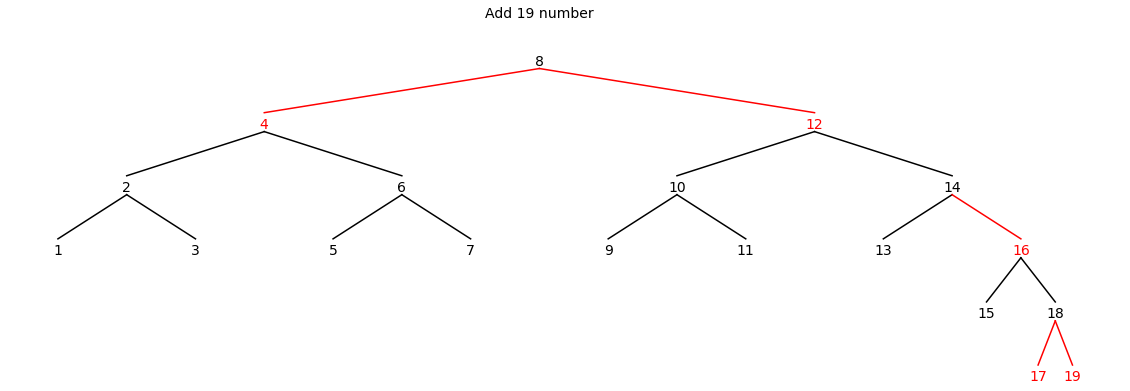

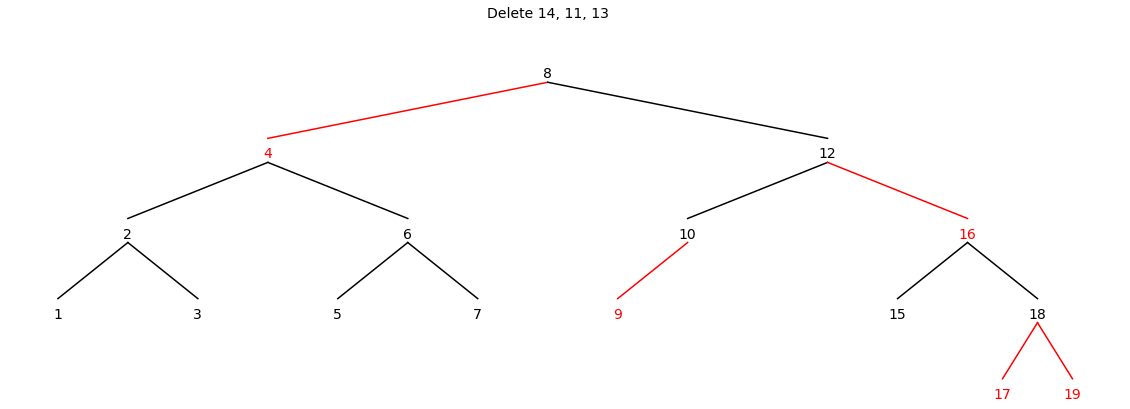

In [6]:
# Create, insert and show tree
insert_arr = [x for x in range(1, 20)]
brTree = BRTree()
for x in insert_arr:
    brTree.insert(x)
brTree.show((20,6), "Add 19 number")

# Delete some nodes in tree
delete_arr = [14,11,13]
for x in delete_arr:
    brTree.delete(x)    
brTree.show((20,6), "Delete 14, 11, 13")